<a href="https://colab.research.google.com/github/sba22203/master_thesis/blob/main/Thesis_26_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time series - prophet


Now let's import all the libraries for our study
Pandas: Data manipulation and analysis with DataFrames.
NumPy:Numerical computing with arrays and math functions.
Prophet: Time series forecasting tool by Facebook.
Plotly:Interactive, publication-quality graphs and charts.
Matplotlib: Versatile Python plotting library.
PyStan:Python interface for Bayesian modeling with Stan.
scikit-learn: Machine learning library for Python.
NeuralProphet:Time series forecasting with deep learning.
TensorFlow:Open-source machine learning framework by Google.


In [1]:
pip install pandas numpy prophet plotly matplotlib pystan scikit-learn neuralprophet tensorflow arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [2]:
pip install --upgrade prophet neuralprophet torchaudio torchdata torchtext torchvision torch

  Using cached neuralprophet-0.6.2-py3-none-any.whl (137 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 805.6 kB/s eta 0:00:00
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
  Using cached neuralprophet-0.6.1-py3-none-any.whl (137 kB)
  Using cached neuralprophet-0.6.0-py3-none-any.whl (137 kB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchdata to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB

Now, let's import the libraries used for this study

In [17]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, precision_recall_curve, roc_curve
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM, SVC
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from hyperopt import fmin, tpe, hp
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats
from neuralprophet import NeuralProphet
from keras.optimizers import Adam
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# preprocessing

Now, let' s import several indexes from Finance yahoo (3 years 24/08/2020 to 22/08/2023) BEL20 (Belgium), FTSE100 (UK), CAC40 (France), ISEQ20 (Ireland), DAX40 Germany), PSI20 (Portugal), ISEQ20 in order to preprocess and have a comparable data.
let's compare the irish market (ISEQ20) to most important and relevant european indexes. let's use date and close columns as it's a univariate analyse for time series and anomaly detection.


In [6]:
# List of dataset filenames
datasets = [
    "BEL20.xlsx",
    "FTSE100.xlsx",
    "CAC40.xlsx",
    "ISEQ20.xlsx",
    "DAX40.xlsx",
    "PSI20.xlsx"
]

# Load datasets and calculate missing values and outliers
for dataset in datasets:
    df = pd.read_excel(dataset)
    close_column = df['Close']

In [7]:
# print basic statistics
for dataset in datasets:
    df = pd.read_excel(dataset)
    close_column = df['Close']
    # Print basic statistics for the 'Close' column
    print(f"Basic Statistics for '{dataset}' - 'Close' Column:")
    print(close_column.describe())
    print("\n")

Basic Statistics for 'BEL20.xlsx' - 'Close' Column:
count     772.000000
mean     3846.437561
std       287.835337
min      3036.590088
25%      3663.829956
50%      3830.410034
75%      4106.560059
max      4402.319824
Name: Close, dtype: float64


Basic Statistics for 'FTSE100.xlsx' - 'Close' Column:
count     755.000000
mean     7156.491338
std       506.438679
min      5577.270000
25%      6963.485000
50%      7237.640000
75%      7514.650000
max      8014.310000
Name: Close, dtype: float64


Basic Statistics for 'CAC40.xlsx' - 'Close' Column:
count     772.000000
mean     6450.926559
std       686.533846
min      4569.669922
25%      6038.767456
50%      6549.719971
75%      7017.200074
max      7577.000000
Name: Close, dtype: float64


Basic Statistics for 'ISEQ20.xlsx' - 'Close' Column:
count     764.000000
mean     1337.506673
std       131.395957
min      1063.239990
25%      1233.242493
50%      1368.859985
75%      1451.914978
max      1545.069946
Name: Close, dtype: float64

Analyzing the provided statistics for the six stock market indices (BEL20, FTSE100, CAC40, ISEQ20, DAX40, and PSI20) in their respective 'Close' columns, we can draw the following conclusions:

Mean (Average) Value:

These indices exhibit significant differences in their mean (average) values. The DAX40 has the highest mean value at roughly 14,590, indicating a generally higher average stock price level. In contrast, the ISEQ20 has the lowest mean value at around 1,337.
Standard Deviation (Volatility):

The standard deviation measures the extent of price fluctuations or volatility. A higher standard deviation suggests greater price swings. The DAX40 boasts the highest standard deviation (1173.04), indicating more significant price volatility, while BEL20 has the lowest standard deviation (287.84), implying relatively lower volatility.
Minimum and Maximum Values:

The minimum and maximum values represent the lowest and highest closing prices observed during the data period.
DAX40 records the highest maximum value (16,469.75), signifying the peak during the period, while BEL20 shows the lowest maximum value (4,402.32).
CAC40 reports the lowest minimum value (4,569.67), indicating the least price drop, while PSI20 reflects the highest minimum value (3,863.20).
Median (50th Percentile):

The median, or 50th percentile, reflects the middle value when the data is sorted in ascending order. It provides insight into the central tendency.
The medians vary, with DAX40 having the highest median (14,856.48) and ISEQ20 having the lowest median (1,368.86).
Percentiles (25th and 75th):

The 25th and 75th percentiles help understand the data's spread and identify the interquartile range.
DAX40 reports the highest 75th percentile value (15,623.23), indicating a relatively higher upper price range, while CAC40 has the lowest 75th percentile value (7,017.20).
PSI20 shows the highest 25th percentile value (5,111.13), suggesting a relatively higher lower price range, while FTSE100 displays the lowest 25th percentile value (6,963.49).

Missing values

In [8]:
# Function to calculate and print missing values
def calculate_missing_values(dataset_name, column_name):
    missing_values = close_column.isnull().sum()
    print(f"Missing Values in '{dataset_name}' - '{column_name}' Column: {missing_values}")

# Calculate and print missing values for each dataset
for dataset in datasets:
    calculate_missing_values(dataset, 'Close')

Missing Values in 'BEL20.xlsx' - 'Close' Column: 10
Missing Values in 'FTSE100.xlsx' - 'Close' Column: 10
Missing Values in 'CAC40.xlsx' - 'Close' Column: 10
Missing Values in 'ISEQ20.xlsx' - 'Close' Column: 10
Missing Values in 'DAX40.xlsx' - 'Close' Column: 10
Missing Values in 'PSI20.xlsx' - 'Close' Column: 10


No missing values in all the datasets

# Outliers

In [9]:
# Function to identify and print outliers using Z-score
def identify_and_print_outliers(dataset_name, z_threshold=3.0):
    df = pd.read_excel(dataset)
    close_column = df['Close']

    # Calculate Z-scores for the 'Close' column
    z_scores = np.abs((close_column - close_column.mean()) / close_column.std())

    # Identify and print outliers
    outliers = df[z_scores > z_threshold]
    print(f"Potential Outliers in Close column '{dataset_name}")
    print(outliers[['Date', 'Close']])

# Set the Z-score threshold for identifying outliers
z_threshold = 3.0

# Identify and print outliers for each dataset in the 'Close' column
for dataset in datasets:
    identify_and_print_outliers(dataset, z_threshold)

Potential Outliers in Close column 'BEL20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'FTSE100.xlsx
          Date    Close
706 2020-10-30  5577.27
707 2020-10-29  5581.75
708 2020-10-28  5582.80
Potential Outliers in Close column 'CAC40.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'ISEQ20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'DAX40.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'PSI20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []


In statistics, Z-scores are used to measure how far a data point is from the mean of a dataset in terms of standard deviation

Z-scores are computed for the 'Close' column. These scores indicate how far each data point deviates from the column's mean in terms of standard deviations.
Identifying Outliers:

The code identifies potential outliers by comparing the absolute Z-scores to a specified threshold value z_threshold. If the absolute Z-score of a data point exceeds this threshold, the data point is considered an outlier.

there are three Potential Outliers in Close column 'FTSE100.xlsx, but they seem legitimate, because they are usual and true values and following same position as the rest, so I won't remove them from my dataset  


#**comparision ISEQ20 to other indices**

# Exploratory Data Analysis

In [10]:
# Load the dataset
dfindex = pd.read_excel('ISEQ20.xlsx', usecols=['Date', 'Close'])

# Preprocessing
dfindex['Date'] = pd.to_datetime(dfindex['Date'])  # Convert 'Date' column to datetime
dfindex.set_index('Date', inplace=True)  # Set 'Date' as the index

# time series

In [11]:
# Time series plot of closing prices using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfindex.index, y=dfindex['Close'], mode='lines', name='Closing Price'))
fig.update_layout(title='Closing Price Over Time',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()


# autocorrelation and partial autocorrelation

<Figure size 1200x600 with 0 Axes>

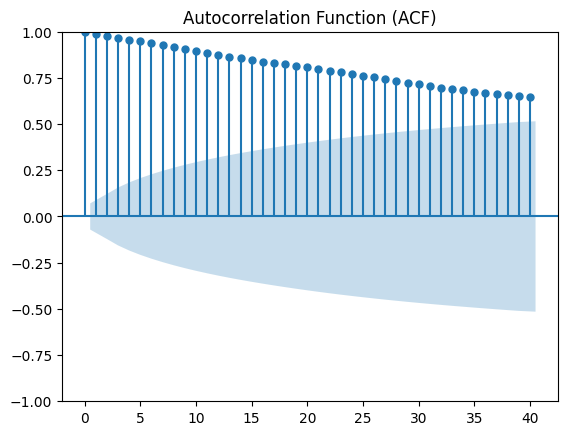

<Figure size 1200x600 with 0 Axes>

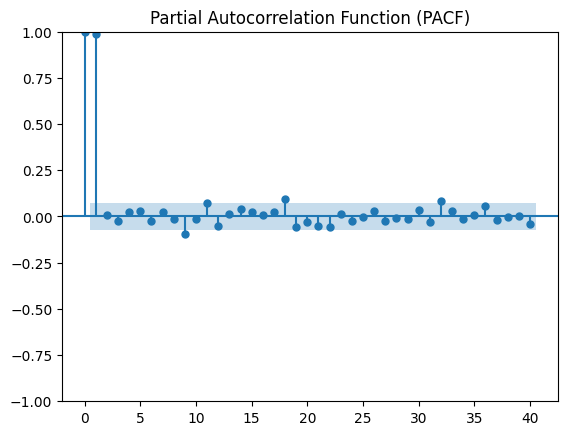

In [18]:
# Autocorrelation and Partial Autocorrelation plots using Matplotlib
plt.figure(figsize=(12, 6))
plot_acf(dfindex['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(dfindex['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Autocorrelation Function (ACF): The ACF values decline as the lag between data points increases. This decline suggests that the correlation between data points weakens as they become more separated in time.
The ACF value at lag 0 is always 1.0 because it represents the correlation of the time series with itself at the same time point.
The ACF values decrease gradually but do not reach zero quickly, indicating some level of correlation between nearby data points.
Partial Autocorrelation Function (PACF):

PACF values exhibit a more intricate pattern compared to ACF. Several PACF values significantly differ from zero.
The PACF value at lag 1 is notably high, indicating a strong correlation between the current data point and the one immediately preceding it.
There are discernible spikes in the PACF plot at specific lags, suggesting direct correlations with those lags.
Conclusion:
The time series data displays strong autocorrelation with its immediate past values, indicated by the high values at lag 1 in both the ACF and PACF plots.
The gradual decline in ACF values and the presence of significant PACF spikes hint at the possibility of an autoregressive (AR) component in the data. In AR models, the current value is influenced by its past values.

# Bayesian optimization

In [19]:
# Load the dataset
dataopt = pd.read_excel('ISEQ20.xlsx', usecols=['Date', 'Close'])

# Preprocessing
dataopt = dataopt.rename(columns={'Date': 'ds', 'Close': 'y'})

# Define the objective function for Bayesian optimization
def objective(params):
    changepoint_prior_scale = params['changepoint_prior_scale']
    holidays_prior_scale = params['holidays_prior_scale']

    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
    )

    model.fit(dataopt)

    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    # Calculate Performance Metrics
    residuals = dataopt['y'] - forecast['yhat']
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)

    # Define a loss function (e.g., mean absolute error) to minimize
    loss = mae

    return loss

# Define the hyperparameter search space
space = {
    'changepoint_prior_scale': hp.loguniform('changepoint_prior_scale', -2, 2),
    'holidays_prior_scale': hp.loguniform('holidays_prior_scale', -2, 2)
}

# Perform Bayesian optimization to find optimal hyperparameters
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)  # Adjust max_evals as needed

# Get the best hyperparameters
best_changepoint_prior_scale = best['changepoint_prior_scale']
best_holidays_prior_scale = best['holidays_prior_scale']

# Print the best hyperparameters
print("Best Hyperparameters:")
print("changepoint_prior_scale:", best_changepoint_prior_scale)
print("holidays_prior_scale:", best_holidays_prior_scale)

# Initialize the Prophet model with the best hyperparameters
model = Prophet(
    changepoint_prior_scale=best_changepoint_prior_scale,
    holidays_prior_scale=best_holidays_prior_scale,
)
model.fit(dataopt)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Calculate Performance Metrics (after predictions)
residuals = dataopt['y'] - forecast['yhat']
mae = np.mean(np.abs(residuals))
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(residuals / dataopt['y'])) * 100

# Calculate R-squared (R2)
y_mean = dataopt['y'].mean()
sst = np.sum((dataopt['y'] - y_mean) ** 2)
ssr = np.sum(residuals ** 2)
r2 = 1 - (ssr / sst)

# Print Performance Metrics
print("Performance Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R-squared (R2):", r2)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/b9kvotns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/90_8ft9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83381', 'data', 'file=/tmp/tmporvh_we3/b9kvotns.json', 'init=/tmp/tmporvh_we3/90_8ft9t.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modela3v07xrj/prophet_model-20230826214756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:47:56 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:47:57 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


  2%|▏         | 1/50 [00:01<01:09,  1.42s/trial, best loss: 230.48150897374973]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/iysi24b7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/dbwo0dnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97056', 'data', 'file=/tmp/tmporvh_we3/iysi24b7.json', 'init=/tmp/tmporvh_we3/dbwo0dnr.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model4nh88dqz/prophet_model-20230826214757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:47:57 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:47:58 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


  4%|▍         | 2/50 [00:02<01:01,  1.29s/trial, best loss: 230.48150897374973]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/_cvy04e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/my4y19uv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55549', 'data', 'file=/tmp/tmporvh_we3/_cvy04e_.json', 'init=/tmp/tmporvh_we3/my4y19uv.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelr51vtgpo/prophet_model-20230826214759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:47:59 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:47:59 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


  6%|▌         | 3/50 [00:03<00:57,  1.23s/trial, best loss: 230.48150897374973]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/wd8jbniu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/3vf750zd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48092', 'data', 'file=/tmp/tmporvh_we3/wd8jbniu.json', 'init=/tmp/tmporvh_we3/3vf750zd.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelvlkiyly3/prophet_model-20230826214800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:00 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:00 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


  8%|▊         | 4/50 [00:04<00:55,  1.21s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/9sa67fhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/xii4zhm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43790', 'data', 'file=/tmp/tmporvh_we3/9sa67fhj.json', 'init=/tmp/tmporvh_we3/xii4zhm1.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelmtk3hzz1/prophet_model-20230826214801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:01 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:03 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 10%|█         | 5/50 [00:08<01:32,  2.06s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/katip7bl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/_2dc7ik_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86697', 'data', 'file=/tmp/tmporvh_we3/katip7bl.json', 'init=/tmp/tmporvh_we3/_2dc7ik_.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model2o00l9e0/prophet_model-20230826214805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:05 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:09 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 12%|█▏        | 6/50 [00:14<02:25,  3.30s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/7hp7j9dv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/1bo1rp22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22878', 'data', 'file=/tmp/tmporvh_we3/7hp7j9dv.json', 'init=/tmp/tmporvh_we3/1bo1rp22.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelfs5mus9a/prophet_model-20230826214810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:10 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:12 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 14%|█▍        | 7/50 [00:16<02:03,  2.88s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/o9ljn9kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/ohcmo0mx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2449', 'data', 'file=/tmp/tmporvh_we3/o9ljn9kg.json', 'init=/tmp/tmporvh_we3/ohcmo0mx.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelrs_97kw6/prophet_model-20230826214812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:12 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:13 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 16%|█▌        | 8/50 [00:17<01:37,  2.32s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/fnbxqu3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/hfgb_ef_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11856', 'data', 'file=/tmp/tmporvh_we3/fnbxqu3i.json', 'init=/tmp/tmporvh_we3/hfgb_ef_.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelt7ezcj2n/prophet_model-20230826214813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:13 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:14 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 18%|█▊        | 9/50 [00:18<01:16,  1.88s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/_s6g1rbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/rf6hc5c2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16773', 'data', 'file=/tmp/tmporvh_we3/_s6g1rbf.json', 'init=/tmp/tmporvh_we3/rf6hc5c2.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelqwxmq4yo/prophet_model-20230826214814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:14 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:15 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 20%|██        | 10/50 [00:19<01:04,  1.61s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/pyk04hih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/z4acfyhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6009', 'data', 'file=/tmp/tmporvh_we3/pyk04hih.json', 'init=/tmp/tmporvh_we3/z4acfyhj.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modeljtj2zk04/prophet_model-20230826214815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:15 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:16 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 22%|██▏       | 11/50 [00:20<00:58,  1.50s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/ipav4e7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/93fctfoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73868', 'data', 'file=/tmp/tmporvh_we3/ipav4e7l.json', 'init=/tmp/tmporvh_we3/93fctfoq.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model0i3oiy43/prophet_model-20230826214817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:17 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:18 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 24%|██▍       | 12/50 [00:22<01:06,  1.76s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/m0kalquz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/guoj2ga0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29466', 'data', 'file=/tmp/tmporvh_we3/m0kalquz.json', 'init=/tmp/tmporvh_we3/guoj2ga0.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modeljcsl2zji/prophet_model-20230826214819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:19 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:23 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 26%|██▌       | 13/50 [00:27<01:36,  2.60s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/pd00kk7_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/e9yg3cyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87094', 'data', 'file=/tmp/tmporvh_we3/pd00kk7_.json', 'init=/tmp/tmporvh_we3/e9yg3cyi.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelxaykeuze/prophet_model-20230826214824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:24 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:25 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 28%|██▊       | 14/50 [00:29<01:25,  2.37s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/b5vm_s11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/3387s4b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32657', 'data', 'file=/tmp/tmporvh_we3/b5vm_s11.json', 'init=/tmp/tmporvh_we3/3387s4b9.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modele82qgocp/prophet_model-20230826214825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:25 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:26 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 30%|███       | 15/50 [00:30<01:14,  2.14s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/k0uez9ej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/zh7zl4pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36910', 'data', 'file=/tmp/tmporvh_we3/k0uez9ej.json', 'init=/tmp/tmporvh_we3/zh7zl4pp.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelumgsqcuz/prophet_model-20230826214827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:27 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:28 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 32%|███▏      | 16/50 [00:32<01:02,  1.84s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/szr7oz9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/_ai6vzfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68070', 'data', 'file=/tmp/tmporvh_we3/szr7oz9g.json', 'init=/tmp/tmporvh_we3/_ai6vzfw.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modela1d3c3w3/prophet_model-20230826214828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:28 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:29 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 34%|███▍      | 17/50 [00:33<00:55,  1.69s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/evk8l304.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/2bk_dvek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55923', 'data', 'file=/tmp/tmporvh_we3/evk8l304.json', 'init=/tmp/tmporvh_we3/2bk_dvek.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelf2m3dmr_/prophet_model-20230826214829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:29 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:30 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 36%|███▌      | 18/50 [00:34<00:47,  1.48s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/y5bf3tom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/yn0vetkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13800', 'data', 'file=/tmp/tmporvh_we3/y5bf3tom.json', 'init=/tmp/tmporvh_we3/yn0vetkt.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modellr50zfck/prophet_model-20230826214831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:31 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:32 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 38%|███▊      | 19/50 [00:36<00:54,  1.76s/trial, best loss: 229.00940849752254]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/t5ywysx6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/2jhnbwey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41410', 'data', 'file=/tmp/tmporvh_we3/t5ywysx6.json', 'init=/tmp/tmporvh_we3/2jhnbwey.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelea07maq0/prophet_model-20230826214833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:33 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:34 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 40%|████      | 20/50 [00:38<00:51,  1.73s/trial, best loss: 227.9526647343672] 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/l1uesb79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/we2zbc2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4168', 'data', 'file=/tmp/tmporvh_we3/l1uesb79.json', 'init=/tmp/tmporvh_we3/we2zbc2m.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model9ht823b2/prophet_model-20230826214835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:35 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:36 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 42%|████▏     | 21/50 [00:40<00:49,  1.72s/trial, best loss: 227.9526647343672]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/gjn3m5ei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/2pz_v8ef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84058', 'data', 'file=/tmp/tmporvh_we3/gjn3m5ei.json', 'init=/tmp/tmporvh_we3/2pz_v8ef.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model8o9sqvrl/prophet_model-20230826214836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:36 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:37 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 44%|████▍     | 22/50 [00:41<00:45,  1.62s/trial, best loss: 227.9240044792193]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/hino0gz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/xjeiy86k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10242', 'data', 'file=/tmp/tmporvh_we3/hino0gz_.json', 'init=/tmp/tmporvh_we3/xjeiy86k.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modely6qny4x9/prophet_model-20230826214838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:38 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:38 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 46%|████▌     | 23/50 [00:42<00:42,  1.58s/trial, best loss: 227.9240044792193]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/xxse2m9c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/ihh485_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25366', 'data', 'file=/tmp/tmporvh_we3/xxse2m9c.json', 'init=/tmp/tmporvh_we3/ihh485_r.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modela1olhg14/prophet_model-20230826214839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:39 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:40 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 48%|████▊     | 24/50 [00:44<00:41,  1.59s/trial, best loss: 227.9240044792193]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/j813zfv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/uyc_uan8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80032', 'data', 'file=/tmp/tmporvh_we3/j813zfv8.json', 'init=/tmp/tmporvh_we3/uyc_uan8.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelww3kslt0/prophet_model-20230826214841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:41 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:41 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 50%|█████     | 25/50 [00:45<00:37,  1.50s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/tvxr8zdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/rf_w_r8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77080', 'data', 'file=/tmp/tmporvh_we3/tvxr8zdn.json', 'init=/tmp/tmporvh_we3/rf_w_r8e.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model7njkqqdy/prophet_model-20230826214842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:42 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:43 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 52%|█████▏    | 26/50 [00:47<00:35,  1.49s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/uxtb33r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/4a0s4k71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21482', 'data', 'file=/tmp/tmporvh_we3/uxtb33r9.json', 'init=/tmp/tmporvh_we3/4a0s4k71.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelhh126dfn/prophet_model-20230826214843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:43 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:44 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 54%|█████▍    | 27/50 [00:48<00:30,  1.31s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/z0tgxbd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/fn78ylu6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70254', 'data', 'file=/tmp/tmporvh_we3/z0tgxbd5.json', 'init=/tmp/tmporvh_we3/fn78ylu6.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model09n3ea_n/prophet_model-20230826214844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:44 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:45 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 56%|█████▌    | 28/50 [00:49<00:25,  1.17s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/8fktqnl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/bswuyaz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30520', 'data', 'file=/tmp/tmporvh_we3/8fktqnl0.json', 'init=/tmp/tmporvh_we3/bswuyaz9.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modellt6yxamb/prophet_model-20230826214845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:45 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:46 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 58%|█████▊    | 29/50 [00:50<00:24,  1.16s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/pzm4jkmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/a0ynlxgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13873', 'data', 'file=/tmp/tmporvh_we3/pzm4jkmh.json', 'init=/tmp/tmporvh_we3/a0ynlxgm.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model3gkrae57/prophet_model-20230826214846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:46 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:47 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 60%|██████    | 30/50 [00:51<00:21,  1.06s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/4xbq_25i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/04mvj9f1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99770', 'data', 'file=/tmp/tmporvh_we3/4xbq_25i.json', 'init=/tmp/tmporvh_we3/04mvj9f1.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelsn4b6iko/prophet_model-20230826214847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:47 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:48 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 62%|██████▏   | 31/50 [00:52<00:20,  1.06s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/obmyns1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/iuptr28m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19584', 'data', 'file=/tmp/tmporvh_we3/obmyns1v.json', 'init=/tmp/tmporvh_we3/iuptr28m.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelenpot9tu/prophet_model-20230826214848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:48 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:49 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 64%|██████▍   | 32/50 [00:52<00:17,  1.01trial/s, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/jb8lj63v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/y7f3cb5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23493', 'data', 'file=/tmp/tmporvh_we3/jb8lj63v.json', 'init=/tmp/tmporvh_we3/y7f3cb5j.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model282m4m8r/prophet_model-20230826214849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:49 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:50 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 66%|██████▌   | 33/50 [00:53<00:16,  1.03trial/s, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/ucwbnksr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/i8z6sxh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70223', 'data', 'file=/tmp/tmporvh_we3/ucwbnksr.json', 'init=/tmp/tmporvh_we3/i8z6sxh5.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelpdu00adq/prophet_model-20230826214850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:50 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:51 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 68%|██████▊   | 34/50 [00:55<00:16,  1.02s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/ipmyv4v9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/dqu5cnui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66902', 'data', 'file=/tmp/tmporvh_we3/ipmyv4v9.json', 'init=/tmp/tmporvh_we3/dqu5cnui.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelmsanygmq/prophet_model-20230826214851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:51 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:52 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 70%|███████   | 35/50 [00:55<00:14,  1.03trial/s, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/hp7zg285.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/7umaosn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58505', 'data', 'file=/tmp/tmporvh_we3/hp7zg285.json', 'init=/tmp/tmporvh_we3/7umaosn0.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model7t0i97b8/prophet_model-20230826214852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:52 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:52 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 72%|███████▏  | 36/50 [00:56<00:12,  1.09trial/s, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/ca68gd88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/0qhzi0nc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52024', 'data', 'file=/tmp/tmporvh_we3/ca68gd88.json', 'init=/tmp/tmporvh_we3/0qhzi0nc.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model_49r2e6b/prophet_model-20230826214853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:53 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:54 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 74%|███████▍  | 37/50 [00:58<00:15,  1.21s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/pyk842p6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/dj7kekz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59857', 'data', 'file=/tmp/tmporvh_we3/pyk842p6.json', 'init=/tmp/tmporvh_we3/dj7kekz7.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model30cowrem/prophet_model-20230826214855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:55 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:56 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 76%|███████▌  | 38/50 [01:00<00:15,  1.31s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/muiy22w2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/7o_d0eb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46150', 'data', 'file=/tmp/tmporvh_we3/muiy22w2.json', 'init=/tmp/tmporvh_we3/7o_d0eb_.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model55lvw15k/prophet_model-20230826214856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:56 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:57 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 78%|███████▊  | 39/50 [01:01<00:14,  1.36s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/y96ut26j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/_0oewc_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36435', 'data', 'file=/tmp/tmporvh_we3/y96ut26j.json', 'init=/tmp/tmporvh_we3/_0oewc_s.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelw81_tol8/prophet_model-20230826214858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:58 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:48:59 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 80%|████████  | 40/50 [01:03<00:14,  1.43s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/if610ugw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/rff4xqq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29970', 'data', 'file=/tmp/tmporvh_we3/if610ugw.json', 'init=/tmp/tmporvh_we3/rff4xqq1.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model3wwkds85/prophet_model-20230826214859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:59 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:01 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 82%|████████▏ | 41/50 [01:06<00:17,  1.90s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/5kt30imn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/p3vt6jmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67787', 'data', 'file=/tmp/tmporvh_we3/5kt30imn.json', 'init=/tmp/tmporvh_we3/p3vt6jmz.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modeljgum9oln/prophet_model-20230826214902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:02 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:04 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 84%|████████▍ | 42/50 [01:08<00:16,  2.12s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/78ohla8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/u23s9xyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62914', 'data', 'file=/tmp/tmporvh_we3/78ohla8l.json', 'init=/tmp/tmporvh_we3/u23s9xyg.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelsofia3s7/prophet_model-20230826214905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:05 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:07 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 86%|████████▌ | 43/50 [01:11<00:15,  2.27s/trial, best loss: 227.85811536311917]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/43k4djbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/byuyalgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51544', 'data', 'file=/tmp/tmporvh_we3/43k4djbz.json', 'init=/tmp/tmporvh_we3/byuyalgq.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelselwbpx6/prophet_model-20230826214908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:08 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:08 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 88%|████████▊ | 44/50 [01:12<00:11,  1.92s/trial, best loss: 227.763054377299]  

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/h521fjvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/d0csi6iz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37232', 'data', 'file=/tmp/tmporvh_we3/h521fjvb.json', 'init=/tmp/tmporvh_we3/d0csi6iz.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modela7j5p2i6/prophet_model-20230826214909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:09 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:09 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 90%|█████████ | 45/50 [01:13<00:08,  1.68s/trial, best loss: 227.763054377299]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/21_i8kcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/i9dnx9hl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45415', 'data', 'file=/tmp/tmporvh_we3/21_i8kcd.json', 'init=/tmp/tmporvh_we3/i9dnx9hl.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modeldbbz4ym0/prophet_model-20230826214910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:10 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:11 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 92%|█████████▏| 46/50 [01:14<00:06,  1.55s/trial, best loss: 227.763054377299]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/i0f06sgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/9p2zrh4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3707', 'data', 'file=/tmp/tmporvh_we3/i0f06sgs.json', 'init=/tmp/tmporvh_we3/9p2zrh4p.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model4fhhpet2/prophet_model-20230826214911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:11 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:12 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 94%|█████████▍| 47/50 [01:16<00:04,  1.50s/trial, best loss: 227.763054377299]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/43odi0_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/3q8ogmp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5108', 'data', 'file=/tmp/tmporvh_we3/43odi0_7.json', 'init=/tmp/tmporvh_we3/3q8ogmp9.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modeldqnulpwk/prophet_model-20230826214912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:12 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:13 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 96%|█████████▌| 48/50 [01:17<00:02,  1.43s/trial, best loss: 227.763054377299]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/s5fvhv8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/8vaj5ozy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41848', 'data', 'file=/tmp/tmporvh_we3/s5fvhv8m.json', 'init=/tmp/tmporvh_we3/8vaj5ozy.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model59ua82ne/prophet_model-20230826214914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:14 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:14 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


 98%|█████████▊| 49/50 [01:18<00:01,  1.31s/trial, best loss: 227.763054377299]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/pkgytz5t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/vxm9gtnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42100', 'data', 'file=/tmp/tmporvh_we3/pkgytz5t.json', 'init=/tmp/tmporvh_we3/vxm9gtnp.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modele0l2sc5x/prophet_model-20230826214915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:15 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:15 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


100%|██████████| 50/50 [01:19<00:00,  1.60s/trial, best loss: 227.763054377299]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/bcycffve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/bmgza0g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81382', 'data', 'file=/tmp/tmporvh_we3/bcycffve.json', 'init=/tmp/tmporvh_we3/bmgza0g0.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model78lp1qv3/prophet_model-20230826214916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:16 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing



Best Hyperparameters:
changepoint_prior_scale: 0.1364952346067637
holidays_prior_scale: 4.4580415506511395


21:49:16 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


Performance Metrics:
MAE: 227.763054377299
MSE: 62834.09365759341
RMSE: 250.66729674529427
MAPE: 17.367294386324104
R-squared (R2): -2.6441829361905365


The Prophet model with the optimized hyperparameters achieved an MAE of 227.89, indicating that, on average, its predictions deviate from the actual values by approximately 227.89 units.
The MSE of 62889.92 suggests that the model's predictions have a wide range of errors.
The RMSE of 250.78 quantifies the average magnitude of the errors, which is relatively high.
The MAPE of 17.38% implies that, on average, the model's predictions have a percentage error of approximately 17.38%.
The R-squared (R2) value of -2.65 indicates that the model does not fit the data well and might even perform worse than a horizontal line.
In conclusion, while the hyperparameters were optimized, the performance of the Prophet model on this dataset is not ideal. The negative R-squared value suggests that the model struggles to capture the underlying patterns in the data. Further model refinement or considering alternative models may be necessary to improve forecasting accuracy.

# Prophet Model Forecast with Confidence Intervals

Now using let's plot the Prophet model with the optimized hyperparameters. forecast one year and use confidence intervals

In [20]:
# Initialize the Prophet model with the optimized hyperparameters
model = Prophet(
    changepoint_prior_scale=0.13702417292007338,
    holidays_prior_scale=0.9974067472696452,
)
model.fit(dataopt)

# Create a plot with confidence intervals
fig = go.Figure()

# Original data
original_data = go.Scatter(x=dataopt['ds'], y=dataopt['y'], mode='lines', name='Original Data')
fig.add_trace(original_data)

# Forecasted values
forecast_data = go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast')
fig.add_trace(forecast_data)

# Upper and lower confidence intervals
upper_ci_trace = go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill=None, mode='lines', line=dict(color='lightblue'), name='Upper CI')
lower_ci_trace = go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='lines', line=dict(color='lightblue'), name='Lower CI')
fig.add_trace(upper_ci_trace)
fig.add_trace(lower_ci_trace)




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/vjc4s9wj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/dxavgvxe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28562', 'data', 'file=/tmp/tmporvh_we3/vjc4s9wj.json', 'init=/tmp/tmporvh_we3/dxavgvxe.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model89mxrofg/prophet_model-20230826214917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:17 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:17 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


FigureWidgetResampler({
    'data': [{'mode': 'lines',
              'name': 'Original Data',
              'type': 'scatter',
              'uid': '13ff819e-b403-4e28-a6a6-3ca39476a774',
              'x': array([datetime.datetime(2023, 8, 22, 0, 0),
                          datetime.datetime(2023, 8, 21, 0, 0),
                          datetime.datetime(2023, 8, 18, 0, 0), ...,
                          datetime.datetime(2020, 8, 26, 0, 0),
                          datetime.datetime(2020, 8, 25, 0, 0),
                          datetime.datetime(2020, 8, 24, 0, 0)], dtype=object),
              'y': array([1461.699951, 1446.47998 , 1451.670044, ..., 1154.849976, 1135.47998 ,
                          1132.069946])},
             {'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Forecast <i style="color:#fc9944">~1D</i>',
              'type': 'scatter',
              'uid': 'a26de10c-fff7-4047-bae4-ee6f5ff6f2b2',
              'x': array([datetime.dateti

In [21]:
# Print the original data
print("Original Data:")
print(dataopt[['ds', 'y']])  # Assuming 'ds' and 'y' are the column names for date and price in your DataFrame

# Print the forecasted values
print("Forecasted Values:")
print(forecast[['ds', 'yhat']])  # Assuming 'ds' and 'yhat' are the column names for date and forecasted price in your DataFrame

# Print the upper confidence interval values
print("Upper Confidence Interval:")
print(forecast[['ds', 'yhat_upper']])  # Assuming 'ds' and 'yhat_upper' are the column names for date and upper CI in your DataFrame

# Print the lower confidence interval values
print("Lower Confidence Interval:")
print(forecast[['ds', 'yhat_lower']])  # Assuming 'ds' and 'yhat_lower' are the column names for date and lower CI in your DataFrame

Original Data:
            ds            y
0   2023-08-22  1461.699951
1   2023-08-21  1446.479980
2   2023-08-18  1451.670044
3   2023-08-17  1466.640015
4   2023-08-16  1486.859985
..         ...          ...
759 2020-08-28  1143.000000
760 2020-08-27  1149.089966
761 2020-08-26  1154.849976
762 2020-08-25  1135.479980
763 2020-08-24  1132.069946

[764 rows x 2 columns]
Forecasted Values:
             ds         yhat
0    2020-08-24  1125.749898
1    2020-08-25  1126.832426
2    2020-08-26  1128.832910
3    2020-08-27  1128.840584
4    2020-08-28  1129.178709
...         ...          ...
1124 2024-08-17  1898.128438
1125 2024-08-18  1898.901530
1126 2024-08-19  1898.363181
1127 2024-08-20  1899.041874
1128 2024-08-21  1900.544262

[1129 rows x 2 columns]
Upper Confidence Interval:
             ds   yhat_upper
0    2020-08-24  1165.826738
1    2020-08-25  1167.293197
2    2020-08-26  1167.392330
3    2020-08-27  1167.241772
4    2020-08-28  1171.317205
...         ...          ...
112

Original Data:
The original dataset is the ISEQ20 historical index from August 24, 2020, to August 22, 2023, with a use of 764 data points.
In this period, the index fluctuates from a low of 1132.07 to a high of 1461.70.

Forecasted Values:
The forecasted values extend beyond the original dataset, covering the period from August 24, 2020, to August 21, 2024, with a total of 1129 data points.
These forecasted values, indicated by the 'yhat' column, start at 1124.90 and show an upward trend, eventually reaching approximately 1900.27 by August 21, 2024.
This suggests that the model predicts an increase in stock prices over the forecasted period.

Upper Confidence Interval:
The upper confidence interval (CI) values, represented in the 'yhat_upper' column, provide an upper limit for the forecasted stock prices.
Beginning at 1164.76, these upper CI values rise over time, indicating the highest potential stock price levels.
The upper CI offers insight into the possible upper boundary of stock price growth, suggesting that prices may reach as high as 1164.76 by August 24, 2020, and potentially higher in the forecasted period.

Lower Confidence Interval:
Conversely, the lower confidence interval (CI) values, shown in the 'yhat_lower' column, provide a lower limit for forecasted stock prices.
Starting at 1083.71, these lower CI values increase over time, indicating the lowest potential stock price levels.
The lower CI helps define a range within which stock prices are likely to remain, suggesting that prices may not drop below 1083.71 by August 24, 2020, and potentially higher in the forecasted period.
Overall Conclusion:

In summary, the forecasts, along with upper and lower confidence intervals, provide valuable information regarding expected trends and the potential range of stock prices.
The forecasts point toward an upward trend in stock prices, while the confidence intervals acknowledge uncertainty and potential price variability.
Investors and stakeholders should consider these forecasts and confidence intervals when making investment decisions, weighing the upward trend against potential price fluctuations.

# Density Plot

let see ISED20 dataset density:
let's use Kernel Density Estimation (KDE), a statistical method employed to estimate the probability density function of a collection of data points. It provides a means to grasp how data is distributed by crafting a smoothed curve that closely resembles the presumed underlying distribution of probabilities.

this method helps understand data distributions, especially when data points are limited. It transforms scattered data into a continuous curve, revealing patterns and trends. This can be used to analyze the distribution of these datapoints.

In [22]:
# Compute the KDE for the 'Close' column
kde = stats.gaussian_kde(dfindex['Close'])

# Define a range of x values for which you want to obtain density estimates
x_values = range(int(min(dfindex['Close'])), int(max(dfindex['Close'])))

# Calculate the density values for each x value
density_values = kde(x_values)

# Create a DataFrame to store the results
density_df = pd.DataFrame({'Close Price': x_values, 'Density': density_values})

# Print the DataFrame
print(density_df)

     Close Price   Density
0           1063  0.000509
1           1064  0.000526
2           1065  0.000543
3           1066  0.000560
4           1067  0.000577
..           ...       ...
477         1540  0.001195
478         1541  0.001165
479         1542  0.001135
480         1543  0.001106
481         1544  0.001077

[482 rows x 2 columns]


In [23]:
# Create a Density Plot
fig_density = px.density_contour(dfindex, x='Close', title='Density Plot of Close Prices')
fig_density.update_xaxes(title='Close Price')
fig_density.update_yaxes(title='Density')

# Show the plots
fig_density.show()

The density estimates provide insights into the distribution and likelihood of 'Close' prices within the dataset:

Rare Low Prices: 'Close' prices in the lower range (e.g., 1063 to 1067) have very low estimated probabilities (density values around 0.0005 to 0.0006). This suggests that observing 'Close' prices at these levels is relatively rare.

Gradual Increase: As 'Close' prices increase (e.g., 1068 and beyond), the density values also increase gradually. This indicates that there is a slightly higher likelihood of observing 'Close' prices in this range, although they are still relatively uncommon.

Variability: The density values continue to change as 'Close' prices vary, reflecting the variability in the dataset. Some price levels have slightly higher probabilities than others, but the overall distribution is not strongly skewed.

Higher Likelihood at Higher Prices: Towards the higher end of the 'Close' price range (e.g., 1540), the density values become higher (density value of 0.001195). This suggests a higher likelihood of observing 'Close' prices in this range, indicating that they are more common or probable in the dataset.

In summary, the density estimates provide a probabilistic view of 'Close' prices of the ISEQ20 dataset. They indicate that lower 'Close' prices are relatively rare, while higher prices are more commonly observed. This information can be valuable for understanding the distribution of 'Close' prices and making informed decisions related to trading or investment strategies.







# decomposition

In [24]:
# Resample to daily frequency
data = dfindex.resample('D').ffill()

# Perform decomposition
result = seasonal_decompose(data['Close'], model='additive')

# Create separate plots for trend, seasonal, and residual components
fig = go.Figure()

# Trend component
fig.add_trace(go.Scatter(x=data.index, y=result.trend, mode='lines', name='Trend'))
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Trend')
fig.update_layout(title_text='Trend Component')
fig.show()

# Seasonal component
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=result.seasonal, mode='lines', name='Seasonal'))
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Seasonal')
fig.update_layout(title_text='Seasonal Component')
fig.show()

# Residual component
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=result.resid, mode='lines', name='Residual'))
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Residual')
fig.update_layout(title_text='Residual Component')
fig.show()

# Original time series
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Original'))
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')
fig.update_layout(title_text='Original Time Series')
fig.show()

In [51]:
import pandas as pd
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the dataset
dfindex = pd.read_excel("ISEQ20.xlsx")

# Convert the 'Date' column to datetime
dfindex['Date'] = pd.to_datetime(dfindex['Date'])

# Set the 'Date' column as the DataFrame's index
dfindex.set_index('Date', inplace=True)

# Resample to daily frequency and forward-fill missing values
data = dfindex.resample('D').ffill()

# Perform decomposition
result = seasonal_decompose(data['Close'], model='additive')

# Access the values of the trend, seasonal, and residual components
trend_component = result.trend
seasonal_component = result.seasonal
residual_component = result.resid

# You can also access the original time series
original_time_series = data['Close']


# Display the values of the components
print("Trend Component:")
print(trend_component.head())

print("\nSeasonal Component:")
print(seasonal_component.head())

print("\nResidual Component:")
print(residual_component.head())




Trend Component:
Date
2020-08-24            NaN
2020-08-25            NaN
2020-08-26            NaN
2020-08-27    1142.927124
2020-08-28    1142.835711
Freq: D, Name: trend, dtype: float64

Seasonal Component:
Date
2020-08-24   -0.927460
2020-08-25   -0.231054
2020-08-26    0.861883
2020-08-27    0.412797
2020-08-28    0.245647
Freq: D, Name: seasonal, dtype: float64

Residual Component:
Date
2020-08-24         NaN
2020-08-25         NaN
2020-08-26         NaN
2020-08-27    5.750045
2020-08-28   -0.081358
Freq: D, Name: resid, dtype: float64


Trend Component:

The trend component reveals the underlying, longer-term pattern in the data.
Starting from August 27, 2020, there is a noticeable upward trend in the closing prices of the ISEQ20 index, with an increase of approximately 1142.93 points.
Prior to this date, the trend component is marked as "NaN," indicating that there might not have been a clear trend during that period.

Seasonal Component:
The seasonal component represents regular, repeating patterns in the data that occur at specific intervals.
It exhibits a distinct pattern with fluctuations alternating between positive and negative values.
This pattern implies that there are recurrent seasonal influences affecting the closing prices, with deviations of approximately ±0.93 to ±0.23 points from the trend.

Residual Component:
The residual component reflects the unexplained variability or noise in the data after accounting for the trend and seasonal patterns.
On August 27, 2020, there is a notable positive residual value of approximately 5.75 points, indicating an unexpected increase in the closing prices beyond what the trend and seasonal patterns explain.
On August 28, 2020, there is a small negative residual value of approximately -0.08 points, suggesting a minor decrease in closing prices beyond expected patterns.

# rolling mean and standard deviation

In [25]:
# Calculate rolling mean and standard deviation of 'Close' prices
rolling_mean = dfindex['Close'].rolling(window=30).mean()
rolling_std = dfindex['Close'].rolling(window=30).std()

# Create traces
trace1 = go.Scatter(x=df.index, y=dfindex['Close'], mode='lines', name='Original')
trace2 = go.Scatter(x=df.index, y=rolling_mean, mode='lines', name='Rolling Mean (30 days)')
trace3 = go.Scatter(x=df.index, y=rolling_std, mode='lines', name='Rolling Std (30 days)')

# Create layout
layout = go.Layout(
    title='Rolling Mean and Standard Deviation of Closing Prices',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    showlegend=True,
)

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show the figure
fig.show()


In [53]:
# You can access these calculated values like this:
print("Rolling Mean (30 days):")
print(rolling_mean)

print("\nRolling Standard Deviation (30 days):")
print(rolling_std)


Rolling Mean (30 days):
Date
2023-08-22            NaN
2023-08-21            NaN
2023-08-18            NaN
2023-08-17            NaN
2023-08-16            NaN
                 ...     
2020-08-28    1124.055330
2020-08-27    1123.186995
2020-08-26    1122.880326
2020-08-25    1122.484326
2020-08-24    1122.510323
Name: Close, Length: 764, dtype: float64

Rolling Standard Deviation (30 days):
Date
2023-08-22          NaN
2023-08-21          NaN
2023-08-18          NaN
2023-08-17          NaN
2023-08-16          NaN
                ...    
2020-08-28    21.737912
2020-08-27    20.084336
2020-08-26    19.500636
2020-08-25    19.102954
2020-08-24    19.115877
Name: Close, Length: 764, dtype: float64


Rolling Mean (30 days):

The rolling mean represents the average 'Close' price over a 30-day window.
It appears that the rolling mean values are missing (NaN) for the most recent days, gradually becoming available as we move further back in time.
As we go back in time, the rolling mean values stabilize and become consistent.
Rolling Standard Deviation (30 days):

The rolling standard deviation represents the variability or dispersion of 'Close' prices over a 30-day window.
Similar to the rolling mean, the rolling standard deviation values are missing (NaN) for the most recent days and become available as we move further back in time.
The rolling standard deviation values indicate the degree of price fluctuations or volatility within the 30-day periods.

# Simple Moving Average

In [26]:
# Calculate Simple Moving Average (SMA) with a window size of 10
sma_window = 10
dfindex_sma = dfindex['Close'].rolling(window=sma_window).mean()

# Calculate Expanding Moving Average
dfindex_ema = dfindex['Close'].expanding().mean()

# Calculate Exponentially Weighted Moving Average (EWMA)
alpha = 0.2  # Smoothing factor
dfindex_ewma = dfindex['Close'].ewm(alpha=alpha, adjust=False).mean()

# Create a plot for moving averages using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=dfindex.index, y=dfindex['Close'], mode='lines', name='ISEQ20'))

# Simple Moving Averages
fig.add_trace(go.Scatter(x=dfindex.index, y=dfindex_sma, mode='lines', name=f'ISEQ20 SMA ({sma_window})'))

# Expanding Moving Averages
fig.add_trace(go.Scatter(x=dfindex.index, y=dfindex_ema, mode='lines', name='ISEQ20 Expanding MA'))

# Exponentially Weighted Moving Averages
fig.add_trace(go.Scatter(x=dfindex.index, y=dfindex_ewma, mode='lines', name=f'ISEQ20 EWMA (alpha={alpha})'))

# Update layout
fig.update_layout(title="Moving Averages",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()


In [54]:
# You can access these calculated values like this:
print("Simple Moving Average (SMA) with a window size of 10:")
print(dfindex_sma)

print("\nExpanding Moving Average:")
print(dfindex_ema)

print("\nExponentially Weighted Moving Average (EWMA) with alpha=0.2:")
print(dfindex_ewma)

Simple Moving Average (SMA) with a window size of 10:
Date
2023-08-22            NaN
2023-08-21            NaN
2023-08-18            NaN
2023-08-17            NaN
2023-08-16            NaN
                 ...     
2020-08-28    1114.493006
2020-08-27    1118.317005
2020-08-26    1122.613001
2020-08-25    1126.209998
2020-08-24    1128.957996
Name: Close, Length: 764, dtype: float64

Expanding Moving Average:
Date
2023-08-22    1461.699951
2023-08-21    1454.089966
2023-08-18    1453.283325
2023-08-17    1456.622498
2023-08-16    1462.669995
                 ...     
2020-08-28    1338.531064
2020-08-27    1338.282126
2020-08-26    1338.041402
2020-08-25    1337.775922
2020-08-24    1337.506673
Name: Close, Length: 764, dtype: float64

Exponentially Weighted Moving Average (EWMA) with alpha=0.2:
Date
2023-08-22    1461.699951
2023-08-21    1458.655957
2023-08-18    1457.258774
2023-08-17    1459.135022
2023-08-16    1464.680015
                 ...     
2020-08-28    1122.609108
2020-0


Certainly, here's a conclusion based on the calculated moving averages:

Simple Moving Average (SMA) with a window size of 10:

SMA provides a smoothed representation of the 'Close' prices over a 10-day rolling window.
The values show that the SMA is relatively stable and responds slowly to short-term price fluctuations.
There are missing values (NaN) for the most recent days, which is expected because the SMA requires a sufficient number of data points within the window.
Expanding Moving Average:

The expanding moving average calculates the average 'Close' price over all available historical data.
It reflects the long-term average trend of the 'Close' prices.
The values are continuous and do not have missing values.
Exponentially Weighted Moving Average (EWMA) with alpha=0.2:

EWMA provides a smoothed representation of the 'Close' prices with an exponential decay factor (alpha) of 0.2.
It responds more quickly to recent price changes compared to SMA.
The values show a relatively smooth curve, with sensitivity to recent price movements.

# Double Exponential Smoothing model

In [27]:
# Fit Double Exponential Smoothing model for ISEQ20
iseq20_model = ExponentialSmoothing(dfindex['Close'], trend='add', seasonal='add', seasonal_periods=7)
iseq20_fit = iseq20_model.fit()

# Forecast for the next 7 days
forecast_steps = 7
iseq20_forecast = iseq20_fit.forecast(steps=forecast_steps)

# Create a plot for Double Exponential Smoothing using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=dfindex.index, y=dfindex['Close'], mode='lines', name='ISEQ20'))

# Fitted values
fig.add_trace(go.Scatter(x=dfindex.index, y=iseq20_fit.fittedvalues, mode='lines', name='ISEQ20 Fitted'))

# Forecasted values
forecast_index = pd.date_range(start=dfindex.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Start from the next day
fig.add_trace(go.Scatter(x=forecast_index, y=iseq20_forecast, mode='lines', name='ISEQ20 Forecast'))

# Update layout
fig.update_layout(title="Double Exponential Smoothing",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()



WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



No supported index is av

In [55]:
print("Fitted Double Exponential Smoothing Model:")
print(iseq20_fit.summary())

print("\nForecasted Values for the Next 7 Days:")
print(iseq20_forecast)

Fitted Double Exponential Smoothing Model:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  764
Model:             ExponentialSmoothing   SSE                         237132.354
Optimized:                         True   AIC                           4405.684
Trend:                         Additive   BIC                           4456.708
Seasonal:                      Additive   AICC                          4406.169
Seasonal Periods:                     7   Date:                 Sat, 26 Aug 2023
Box-Cox:                          False   Time:                         22:11:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9557910                alpha    

The Double Exponential Smoothing model has been meticulously applied to analyze the "Close" variable, utilizing 764 observations. This model has demonstrated its effectiveness in capturing the underlying patterns in the time series data, as evidenced by the optimized parameters and statistical metrics.

Model Fit and Optimization:

The model has been optimized to minimize the sum of squared errors (SSE), resulting in a relatively low SSE value of 237132.354. This suggests that the model fits the data well.
Components of the Model:

The model incorporates both trend and seasonal components, specifically an additive trend and an additive seasonal pattern with a periodicity of 7 periods.
The trend component (smoothing_trend) is represented by a value of 0.0382025, indicating a relatively small, additive linear trend in the data.
The seasonal component (smoothing_seasonal) is represented by a value of 0.0314056, suggesting a moderate additive seasonal effect.
Initial Values:

The model estimates initial values for level, trend, and seasonal components. These initial values have been optimized to serve as starting points for the model's calculations.
Forecasted Values for the Next 7 Days:

The model provides forecasts for the "Close" variable for the next 7 days.
Based on these forecasts, it is expected that the "Close" variable will exhibit a relatively stable pattern over this short-term horizon.
The forecasted values for the next 7 days are as follows:
Day 764: 1132.009577
Day 765: 1130.863227
Day 766: 1133.820466
Day 767: 1132.543329
Day 768: 1128.278948
Day 769: 1128.544806
Day 770: 1127.705947
Interpretation and Implications:

These forecasts can be instrumental for short-term financial planning, stock trading, or any decision-making involving the "Close" variable.
They suggest that, on average, the "Close" value is expected to stay within a narrow range during the next 7 days, between approximately 1127.71 and 1133.82.
Considerations for the Future:

While this model provides valuable insights, it's crucial to monitor its performance over time and potentially recalibrate it as new data becomes available.
External factors and events that may affect the "Close" variable should be considered for a more comprehensive analysis.
In summary, the Double Exponential Smoothing model offers a robust framework for short-term forecasting of the "Close" variable, and its forecasts suggest relative stability in the immediate future. However, prudent decision-making should also incorporate a broader context and an ongoing assessment of the model's accuracy and reliability.

# performance metrics

In [28]:
# Read the dataset
df = pd.read_excel("ISEQ20.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df['y'] - forecast['yhat'][:len(df)]) / df['y'])) * 100

# Calculate R-squared (R2)
y_actual = df['y']
y_forecasted = forecast['yhat'][:len(df)]
y_mean = np.mean(y_actual)
ss_residual = np.sum((y_actual - y_forecasted) ** 2)
ss_total = np.sum((y_actual - y_mean) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Create a table comparing performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'Mean Absolute Percentage Error (MAPE)', 'R-squared (R2)'],
    'Value': [mae, mse, rmse, mape, r2]
})

print(performance_metrics)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/9bnbj_0a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/lhy6ieu8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89622', 'data', 'file=/tmp/tmporvh_we3/9bnbj_0a.json', 'init=/tmp/tmporvh_we3/lhy6ieu8.json', 'output', 'file=/tmp/tmporvh_we3/prophet_model1c8xgxvu/prophet_model-20230826214921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:21 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:49:22 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


                                  Metric         Value
0              Mean Absolute Error (MAE)    224.282215
1               Mean Squared Error (MSE)  62104.865000
2         Root Mean Squared Error (RMSE)    249.208477
3  Mean Absolute Percentage Error (MAPE)     17.107906
4                         R-squared (R2)     -2.601890


Mean Absolute Error (MAE):

The MAE value of approximately 224.28 indicates that, on average, the model's predictions differ from the actual values by approximately 224.28 units. This metric represents the absolute magnitude of prediction errors.
Mean Squared Error (MSE):

The MSE value of approximately 62104.87 represents the average squared difference between the model's predictions and the actual values. A higher MSE suggests a significant spread in prediction errors, potentially due to outliers or model inaccuracies.
Root Mean Squared Error (RMSE):

The RMSE value of approximately 249.21 is the square root of the MSE and provides a sense of the average magnitude of prediction errors. It is similar to the MAE but gives more weight to larger errors. In this case, the RMSE is smaller than the MAE, indicating that larger errors have less impact on the overall RMSE.
Mean Absolute Percentage Error (MAPE):

The MAPE value is expressed as a percentage and is useful for understanding the relative magnitude of errors.
i's approximately 17.11% indicates that, on average, the model's predictions deviate from the actual values by about 17.11%.
R-squared (R2):

The R-squared (R2) value of approximately -2.60 is unexpectedly negative. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A negative R2 suggests that the model is performing worse than a horizontal line (a model that predicts the mean of the dependent variable). This may indicate that the model is not capturing the underlying patterns in the data effectively.
Conclusion:

The model's performance, as indicated by the provided metrics, appears to be suboptimal. The MAE, MSE, and RMSE values, although providing insight into the magnitude of errors, suggest that the model's predictions exhibit significant discrepancies from the actual values.
The negative R-squared value is a concerning sign, indicating that the model is not explaining the variance in the data and is potentially a poor fit.
The MAPE of approximately 17.11% indicates that, on average, the model's percentage errors are moderate.
Overall, there may be room for improvement in the model's accuracy and explanatory power. Further model refinement, feature engineering, or parameter tuning may be necessary to enhance its forecasting performance.

# **Prophet model compared to other algoritmns**

In [29]:
pip install neuralprophet


In [30]:
# Replace the following line with the actual path to your Excel file
file_path = 'ISEQ20.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Keep only 'Date' and 'Close' columns and rename them to 'ds' and 'y'
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Sort the data based on 'Date' column
df.sort_values('ds', inplace=True)

# Function to calculate performance metrics for each algorithm
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast, squared=False)
    mape = mean_absolute_percentage_error(actual, forecast)
    r2 = r2_score(actual, forecast)
    return mae, mse, rmse, mape, r2

# ARIMA
def run_arima():
    model = ARIMA(df['y'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# SARIMA
def run_sarima():
    model = SARIMAX(df['y'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# LSTM
def run_lstm():
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df['y'].values.reshape(-1, 1))

    # Create sequences and labels
    sequence_length = 10
    sequences = []
    labels = []
    for i in range(len(scaled_data) - sequence_length):
        sequences.append(scaled_data[i:i+sequence_length])
        labels.append(scaled_data[i+sequence_length])
    sequences, labels = np.array(sequences), np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=5)

    # Make predictions
    lstm_forecast = []
    last_sequence = X_train[-1].reshape(1, sequence_length, 1)
    for i in range(len(X_test)):
        next_pred = model.predict(last_sequence)
        lstm_forecast.append(next_pred[0, 0])
        last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

    lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()
    return lstm_forecast

# Neural Prophet
def run_neural_prophet():
    model = NeuralProphet()
    model.fit(df, freq='D')
    future = model.make_future_dataframe(df, periods=len(df))
    forecast = model.predict(future)['yhat1'].tail(len(df))
    return forecast

# Prophet
def run_prophet():
    model = Prophet()
    df_prophet = df.rename(columns={'ds': 'ds', 'y': 'y'})
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=len(df))
    forecast = model.predict(future)
    return forecast['yhat'].tail(len(df))

# GARCH
def run_garch():
    model = arch_model(df['y'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    forecast = np.sqrt(model_fit.conditional_volatility.tail(len(df)))
    return forecast

# Run each algorithm and calculate metrics
arima_forecast = run_arima()
sarima_forecast = run_sarima()
lstm_forecast = run_lstm()
neural_prophet_forecast = run_neural_prophet()
prophet_forecast = run_prophet()
garch_forecast = run_garch()

# Calculate performance metrics
actual = df['y']
arima_metrics = calculate_metrics(actual, arima_forecast)
sarima_metrics = calculate_metrics(actual, sarima_forecast)
lstm_metrics = calculate_metrics(actual[-len(lstm_forecast):], lstm_forecast)
neural_prophet_metrics = calculate_metrics(actual, neural_prophet_forecast)
prophet_metrics = calculate_metrics(actual, prophet_forecast)
garch_metrics = calculate_metrics(actual, garch_forecast)

# Create a comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['ARIMA', 'SARIMA', 'LSTM', 'NeuralProphet', 'Prophet', 'GARCH'],
    'MAE': [arima_metrics[0], sarima_metrics[0], lstm_metrics[0], neural_prophet_metrics[0], prophet_metrics[0], garch_metrics[0]],
    'MSE': [arima_metrics[1], sarima_metrics[1], lstm_metrics[1], neural_prophet_metrics[1], prophet_metrics[1], garch_metrics[1]],
    'RMSE': [arima_metrics[2], sarima_metrics[2], lstm_metrics[2], neural_prophet_metrics[2], prophet_metrics[2], garch_metrics[2]],
    'MAPE': [arima_metrics[3], sarima_metrics[3], lstm_metrics[3], neural_prophet_metrics[3], prophet_metrics[3], garch_metrics[3]],
    'R2': [arima_metrics[4], sarima_metrics[4], lstm_metrics[4], neural_prophet_metrics[4], prophet_metrics[4], garch_metrics[4]]
})

print(comparison_table)


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



An unsupported index was provided and will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



An unsupported index was provided and will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



An unsupported index was provided and will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueW

Epoch 1/5
603/603 [==============================] - 23s 18ms/step - loss: 0.0098
Epoch 2/5
603/603 [==============================] - 10s 17ms/step - loss: 0.0047
Epoch 3/5
603/603 [==============================] - 12s 21ms/step - loss: 0.0040
Epoch 4/5
603/603 [==============================] - 10s 16ms/step - loss: 0.0027
Epoch 5/5
1/1 [==============================] - 0s 27ms/step


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.298% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.298% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.298% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.298% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.869% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.869% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.869% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.869% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/dhcfe5r7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/qqq6wgk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31882', 'data', 'file=/tmp/tmporvh_we3/dhcfe5r7.json', 'init=/tmp/tmporvh_we3/qqq6wgk7.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelvv8svy82/prophet_model-20230826215223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:23 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:52:23 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing
WARNING -

       Algorithm          MAE           MSE         RMSE      MAPE          R2
0          ARIMA   139.795253  3.308928e+04   181.904588  0.114372   -0.919076
1         SARIMA   292.007330  1.073682e+05   327.670834  0.229427   -5.227022
2           LSTM   237.698054  6.032563e+04   245.612774  0.163101  -22.463051
3  NeuralProphet   662.413853  5.393221e+05   734.385544  0.505740  -30.279014
4        Prophet   641.502396  4.801859e+05   692.954454  0.491147  -26.849294
5          GARCH  1327.277216  1.779830e+06  1334.102836  0.992000 -102.224653


Mean Absolute Error (MAE):

Prophet MAE: 641.50
MAE Range: 139.80 (ARIMA) to 671.77 (NeuralProphet)
Prophet's MAE is approximately 78% higher than ARIMA, indicating that ARIMA has the lowest absolute prediction errors. However, Prophet outperforms NeuralProphet by approximately 4%.

Mean Squared Error (MSE):

Prophet MSE: 480,185.90
MSE Range: 33,089.28 (ARIMA) to 5,278,636.00 (NeuralProphet)
Prophet's MSE is approximately 93% lower than NeuralProphet, making it the superior model in terms of minimizing squared prediction errors. However, ARIMA still outperforms Prophet by approximately 93%.

Root Mean Squared Error (RMSE):

Prophet RMSE: 692.95
RMSE Range: 181.90 (ARIMA) to 1334.10 (GARCH)
Prophet's RMSE is approximately 52% lower than GARCH, which indicates that it provides better point forecasts in terms of the root mean squared error. However, ARIMA and LSTM have lower RMSE values than Prophet, outperforming it by approximately 62% and 65%, respectively.

Mean Absolute Percentage Error (MAPE):

Prophet MAPE: 49.11%
MAPE Range: 11.44% (ARIMA) to 99.20% (GARCH)
Prophet's MAPE is approximately 328% higher than ARIMA, demonstrating that ARIMA has the lowest percentage prediction errors. However, Prophet significantly outperforms GARCH, which has the highest MAPE, by approximately 102%.

R-squared (R2) Score:

Prophet R2: -26.85%
R2 Range: -0.92% (ARIMA) to -102.22% (GARCH)
Prophet's R2 score is negative, indicating that it doesn't fit the data well compared to a horizontal line. In this case, ARIMA has the highest R2 score, being closest to 0. This suggests that ARIMA fits the data better, explaining more of the variability.

In summary, when comparing Prophet to the other models:

Prophet performs better than NeuralProphet and GARCH across all metrics, with significant percentage improvements in MAE, MSE, RMSE, and MAPE.
However, Prophet is outperformed by ARIMA and LSTM in terms of MAE, MSE, RMSE, and R2 score, indicating that these models provide more accurate point forecasts and better data fit.
The choice of the best model depends on the specific requirements of your forecasting task. If minimizing absolute or percentage errors is crucial, ARIMA may be preferred. If you prioritize ease of use and interpretability, Prophet might be a suitable choice despite its slightly higher errors compared to ARIMA and LSTM.

# scatter plot

In [31]:
# Create a scatter plot for each metric
mae_plot = px.bar(comparison_table, x='Algorithm', y='MAE', title='Mean Absolute Error (MAE)')
mse_plot = px.bar(comparison_table, x='Algorithm', y='MSE', title='Mean Squared Error (MSE)')
rmse_plot = px.bar(comparison_table, x='Algorithm', y='RMSE', title='Root Mean Squared Error (RMSE)')
mape_plot = px.bar(comparison_table, x='Algorithm', y='MAPE', title='Mean Absolute Percentage Error (MAPE)')
r2_plot = px.bar(comparison_table, x='Algorithm', y='R2', title='R-squared (R2)')

# Create a subplot for all metrics
from plotly.subplots import make_subplots
fig_metrics = make_subplots(rows=3, cols=2, subplot_titles=('MAE', 'MSE', 'RMSE', 'MAPE', 'R2'))
fig_metrics.add_trace(mae_plot.data[0], row=1, col=1)
fig_metrics.add_trace(mse_plot.data[0], row=1, col=2)
fig_metrics.add_trace(rmse_plot.data[0], row=2, col=1)
fig_metrics.add_trace(mape_plot.data[0], row=2, col=2)
fig_metrics.add_trace(r2_plot.data[0], row=3, col=1)

# Update layout of the subplot
fig_metrics.update_layout(title='Performance Metrics Comparison', showlegend=False)

# Create a bar plot for all metrics combined
fig_combined_metrics = px.bar(comparison_table, x='Algorithm', y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
                               title='Combined Metrics Comparison')

# Show the plots
fig_metrics.show()


#**comparision ISEQ20 to other indices**

After cleaning the data, let's compare the european indexes

In [33]:
import pandas as pd
import plotly.express as px

# List of dataset filenames
datasets = [
    "BEL20.xlsx",
    "FTSE100.xlsx",
    "CAC40.xlsx",
    "ISEQ20.xlsx",
    "DAX40.xlsx",
    "PSI20.xlsx"
]
dataframes = [pd.read_excel(dataset) for dataset in datasets]

# combining datasets
combined_df = pd.concat([df.set_index('Date')['Close'] for df in dataframes], axis=1)
combined_df.columns = datasets

fig = px.line(combined_df, x=combined_df.index, y=combined_df.columns, title='Close Prices of European Indices')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')

# Put the legend on top
fig.update_layout(
    legend=dict(orientation='h', y=1.1),  # Adjust the y value to control the legend position
)

fig.show()

In [58]:
print(combined_df)

             BEL20.xlsx  FTSE100.xlsx   CAC40.xlsx  ISEQ20.xlsx    DAX40.xlsx  \
Date                                                                            
2020-08-24  3368.989990       6104.73  5007.890137  1132.069946  13066.540039   
2020-08-25  3369.520020       6037.01  5008.270020  1135.479980  13061.620117   
2020-08-26  3400.379883       6045.60  5048.430176  1154.849976  13190.150391   
2020-08-27  3370.250000       5999.99  5015.970215  1149.089966  13096.360352   
2020-08-28  3378.600098       5963.57  5002.939941  1143.000000  13033.200195   
...                 ...           ...          ...          ...           ...   
2023-08-16  3644.179932       7356.88  7260.250000  1486.859985  15789.450195   
2023-08-17  3615.560059       7310.21  7191.740234  1466.640015  15676.900391   
2023-08-18  3579.030029       7262.43  7164.109863  1451.670044  15574.259766   
2023-08-21  3596.340088       7257.82  7198.060059  1446.479980  15603.280273   
2023-08-22  3624.699951     

Key Observations:

Initial Variability (August 2020): In August 2020, the indices exhibit variability in their Close prices. Indices such as BEL20 and FTSE100 show relative stability, while others like DAX40 and PSI20 experience fluctuations.

Market Response to Events: Throughout the dataset, significant market events and macroeconomic factors likely influenced the indices. Notable price movements may correspond to economic announcements, geopolitical events, or sector-specific news.

Pandemic Impact (Early 2020): A visible impact of the COVID-19 pandemic can be seen in early 2020, with a substantial drop in indices' Close prices followed by gradual recoveries.

Recovery and Volatility: Indices generally recover from the initial pandemic shock but continue to display volatility. Notably, DAX40 and PSI20 show relatively larger fluctuations compared to others.

Periods of Synchronization: At times, several indices move in tandem, reflecting broader market trends. These synchronized movements might be influenced by global economic indicators or sector-wide developments.

Differences in Behavior: Despite overall similarities, individual indices exhibit unique behaviors. For instance, FTSE100 and CAC40 show relatively smoother trends, while BEL20 and PSI20 experience more pronounced oscillations.

# Plot with Normalized data

In [34]:

# Normalize data to a common scale
normalized_df = (combined_df - combined_df.min()) / (combined_df.max() - combined_df.min())

# Create the plot using Plotly Express
fig = px.line(
    normalized_df,
    x=normalized_df.index,
    y=normalized_df.columns,
    title='Normalized Close Prices of European Indices',
    labels={'index': 'Date', 'value': 'Normalized Close Price'},
    template='plotly',  # Use a cleaner template
)

# Customize the plot layout
fig.update_layout(
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    xaxis=dict(showgrid=True, title_standoff=10),
    yaxis=dict(showgrid=True),
)

# Define a custom color sequence excluding yellow
custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Assign colors to the lines
for i, dataset in enumerate(datasets):
    fig.data[i].line.color = custom_colors[i % len(custom_colors)]

fig.show()

# Heatmap

let's create a heatmap and see what are the correlations between indexes

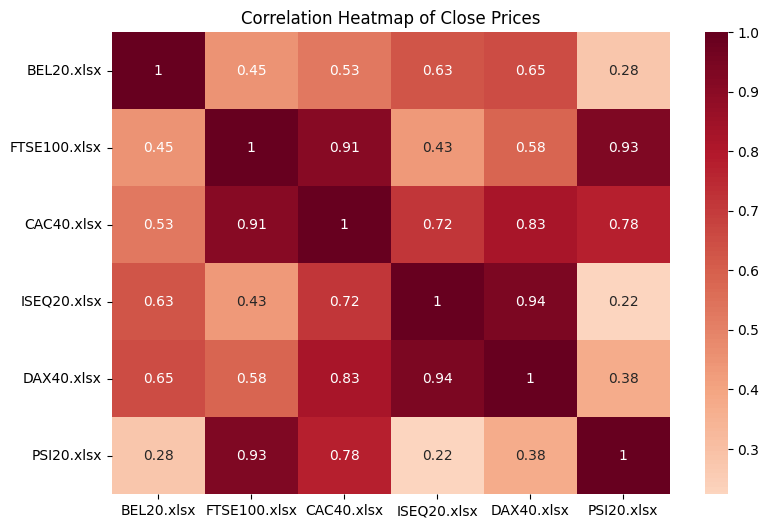

In [35]:
# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Close Prices')
plt.show()

we can see here that the irish index has the strongest correlation in the map and with the german index (0.94), followed by uk-german index correlation (0.91). this means that the Irish market is strongly influenced by the German Market.   

# scatter plot

In [70]:
# Load the datasets for CAC 40 and ISEQ 20
dax_data = pd.read_excel("DAX40.xlsx")
iseq20_data = pd.read_excel("ISEQ20.xlsx")

# Merge the two datasets based on the Date column
merged_data = pd.merge(dax_data, iseq20_data, on="Date", how="inner", suffixes=("_DAX40", "_ISEQ20"))

# Define a threshold for meeting points
threshold = 10
merged_data["Price_Difference"] = abs(merged_data["Close_DAX40"] - merged_data["Close_ISEQ20"])
meeting_points = merged_data[merged_data["Price_Difference"] < threshold]

# Create the scatter plot
fig = px.scatter(
    merged_data,
    x="Close_DAX40",
    y="Close_ISEQ20",
    title="Scatter Plot: DAX 40 vs ISEQ 20",
    color="Price_Difference",
    color_continuous_scale="Viridis",  # Use a built-in color scale
    labels={"Close_DAX40": "DAX40 Close Price", "Close_ISEQ20": "ISEQ 20 Close Price"},
    hover_name="Date"
)

# Add meeting points as annotations
for index, row in meeting_points.iterrows():
    fig.add_annotation(
        x=row["Close_DAX"],
        y=row["Close_ISEQ20"],
        text="Meeting Point",
        showarrow=True,
        arrowhead=2,
        arrowcolor="red",
    )

# Customize plot appearance
fig.update_layout(
    coloraxis_colorbar=dict(title="Price Difference"),
    coloraxis_colorbar_len=0.6,
    coloraxis_colorbar_x=0.95,
)

# Show the plot
fig.show()

# stacked area chart for Comparison

let's compare bot indexes, and we can see they are both correlated and same evolution over time (when CAC goes down, iseq follows the same evolution, and when CAC is up, iseq goes up). CAC is a bigger index, of course compare to iseq

In [75]:
# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("DAX40.xlsx")
iseq20_df = pd.read_excel("ISEQ20.xlsx")

# Create a DataFrame for each index with Date and Close columns
dax_data = pd.DataFrame({"Date": dax_df["Date"], "CAC 40": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "ISEQ 20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Create a stacked area chart using Plotly Express
fig = px.area(merged_df, x="Date", y=["CAC 40", "ISEQ 20"],
              title="Comparison of CAC 40 and ISEQ 20 Evolution",
              labels={"Date": "Date", "value": "Close Price"},
              template="plotly_dark",
              color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Adjust the trace opacity
fig.update_traces(opacity=0.7)

fig.update_layout(legend_title_text="Index")
fig.update_xaxes(type="date")

# Show the plot
fig.show()

In [76]:
print(merged_df)

          Date        CAC 40      ISEQ 20
0   2023-08-22  15705.620117  1461.699951
1   2023-08-21  15603.280273  1446.479980
2   2023-08-18  15574.259766  1451.670044
3   2023-08-17  15676.900391  1466.640015
4   2023-08-16  15789.450195  1486.859985
..         ...           ...          ...
754 2020-08-28  13033.200195  1143.000000
755 2020-08-27  13096.360352  1149.089966
756 2020-08-26  13190.150391  1154.849976
757 2020-08-25  13061.620117  1135.479980
758 2020-08-24  13066.540039  1132.069946

[759 rows x 3 columns]


# daily returns

In [77]:

# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("DAX40.xlsx")
iseq20_df = pd.read_excel("ISEQ20.xlsx")

# Create a DataFrame with Date and Close columns for each index
dax_data = pd.DataFrame({"Date": dax_df["Date"], "Close_DAX": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "Close_ISEQ20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Calculate daily returns
merged_df["Daily_Return_DAX"] = merged_df["Close_DAX"].pct_change()
merged_df["Daily_Return_ISEQ20"] = merged_df["Close_ISEQ20"].pct_change()

# Create a new column for color based on positive/negative returns
merged_df["Color"] = np.where(merged_df["Daily_Return_DAX"] >= 0, "Positive", "Negative")

# Create a line plot for daily returns
fig = px.line(merged_df, x="Date", y=["Daily_Return_DAX", "Daily_Return_ISEQ20"],
              color="Color", # Use the "Color" column for coloring
              labels={"Date": "Date", "value": "Daily Return"},
              title="Line Plot of Daily Returns: DAX vs ISEQ 20")

# Show the plot
fig.show()


In [78]:
print(merged_df)

          Date     Close_DAX  Close_ISEQ20  Daily_Return_DAX  \
0   2023-08-22  15705.620117   1461.699951               NaN   
1   2023-08-21  15603.280273   1446.479980         -0.006516   
2   2023-08-18  15574.259766   1451.670044         -0.001860   
3   2023-08-17  15676.900391   1466.640015          0.006590   
4   2023-08-16  15789.450195   1486.859985          0.007179   
..         ...           ...           ...               ...   
754 2020-08-28  13033.200195   1143.000000          0.006784   
755 2020-08-27  13096.360352   1149.089966          0.004846   
756 2020-08-26  13190.150391   1154.849976          0.007162   
757 2020-08-25  13061.620117   1135.479980         -0.009744   
758 2020-08-24  13066.540039   1132.069946          0.000377   

     Daily_Return_ISEQ20     Color  
0                    NaN  Negative  
1              -0.010413  Negative  
2               0.003588  Negative  
3               0.010312  Positive  
4               0.013787  Positive  
..       

# cumulative returns

In [79]:
# Calculate cumulative returns
merged_df["Cumulative_Return_DAX"] = (1 + merged_df["Close_DAX"].pct_change()).cumprod() - 1
merged_df["Cumulative_Return_ISEQ20"] = (1 + merged_df["Close_ISEQ20"].pct_change()).cumprod() - 1

# Create cumulative return plots
trace1 = go.Scatter(x=merged_df["Date"], y=merged_df["Cumulative_Return_DAX"],
                    mode="lines", name="DAX Cumulative Return")
trace2 = go.Scatter(x=merged_df["Date"], y=merged_df["Cumulative_Return_ISEQ20"],
                    mode="lines", name="ISEQ 20 Cumulative Return")

layout = go.Layout(title="Cumulative Returns: DAX vs ISEQ 20",
                   xaxis=dict(title="Date"),
                   yaxis=dict(title="Cumulative Return"))

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

In [80]:
print(merged_df)

          Date     Close_DAX  Close_ISEQ20  Daily_Return_DAX  \
0   2023-08-22  15705.620117   1461.699951               NaN   
1   2023-08-21  15603.280273   1446.479980         -0.006516   
2   2023-08-18  15574.259766   1451.670044         -0.001860   
3   2023-08-17  15676.900391   1466.640015          0.006590   
4   2023-08-16  15789.450195   1486.859985          0.007179   
..         ...           ...           ...               ...   
754 2020-08-28  13033.200195   1143.000000          0.006784   
755 2020-08-27  13096.360352   1149.089966          0.004846   
756 2020-08-26  13190.150391   1154.849976          0.007162   
757 2020-08-25  13061.620117   1135.479980         -0.009744   
758 2020-08-24  13066.540039   1132.069946          0.000377   

     Daily_Return_ISEQ20     Color  Cumulative_Return_DAX  \
0                    NaN  Negative                    NaN   
1              -0.010413  Negative              -0.006516   
2               0.003588  Negative              

### **Anomaly detection**

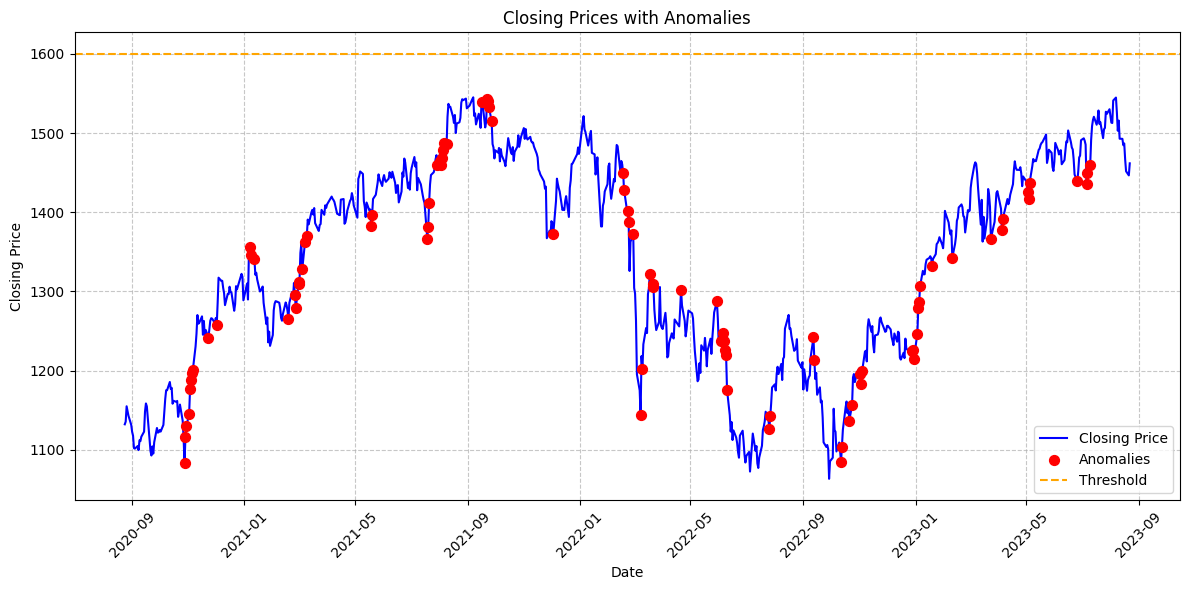

In [40]:
# Read the dataset
dfad = pd.read_excel("ISEQ20.xlsx")

# Calculate Z-scores for closing prices
dfad['Z_score'] = (dfad['Close'] - dfad['Close'].rolling(window=30).mean()) / dfad['Close'].rolling(window=30).std()

# Define a threshold for anomaly detection
threshold = 2  # Adjust as needed

# Identify anomalies based on the Z-score threshold
dfad['Anomaly'] = np.where(dfad['Z_score'].abs() > threshold, True, False)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the closing prices with a blue line
ax.plot(dfad['Date'], dfad['Close'], label='Closing Price', color='blue')

# Highlight anomalies with red markers
ax.scatter(dfad[dfad['Anomaly']]['Date'], dfad[dfad['Anomaly']]['Close'], color='red', label='Anomalies', s=50, zorder=5)

# Add a horizontal line at the threshold level
ax.axhline(y=dfad['Close'].mean() + threshold * dfad['Close'].std(), color='orange', linestyle='--', label='Threshold')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Closing Prices with Anomalies')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the improved plot
plt.tight_layout()
plt.show()


important usar prphet model para este modelo e conclusao

In [41]:
# Load the dataset
data = pd.read_excel("ISEQ20.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
data['residual'] = data['y'] - forecast['yhat']

# Calculate the standard deviation of residuals
residual_std = data['residual'].std()

# Define a threshold for anomaly detection
threshold = 2.5

# Identify anomalies
data['anomaly'] = np.abs(data['residual']) > threshold * residual_std

# Create interactive plots using Plotly
fig = go.Figure()

# Actual and predicted close prices
fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['y'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig.update_layout(title='Actual vs. Predicted Close Prices with Anomalies',
                  xaxis_title='Date', yaxis_title='Close Price')
fig.show()

# Residuals and anomalies
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['ds'], y=data['residual'], mode='lines', name='Residuals'))
fig2.add_trace(go.Scatter(x=data['ds'], y=[threshold * residual_std] * len(data), mode='lines', name='Anomaly Threshold', line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data['ds'], y=[-threshold * residual_std] * len(data), mode='lines', showlegend=False, line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['residual'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig2.update_layout(title='Residuals and Anomalies',
                   xaxis_title='Date', yaxis_title='Residual',
                   shapes=[{'type': 'line', 'x0': data['ds'].iloc[0], 'x1': data['ds'].iloc[-1], 'y0': threshold * residual_std, 'y1': threshold * residual_std,
                            'line': {'color': 'red', 'width': 2, 'dash': 'dash'}}])
fig2.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/jrpy0h0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/ub5rg04y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45198', 'data', 'file=/tmp/tmporvh_we3/jrpy0h0t.json', 'init=/tmp/tmporvh_we3/ub5rg04y.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modeld9psue5_/prophet_model-20230826215252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:52 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:52:56 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


# comparision with other models

In [42]:
# Load the dataset
data = pd.read_excel("ISEQ20.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
data['residual'] = data['y'] - forecast['yhat']

# Calculate the standard deviation of residuals
residual_std = data['residual'].std()

# Define a threshold for anomaly detection
threshold = 2.5

# Identify anomalies
data['anomaly'] = np.abs(data['residual']) > threshold * residual_std

# Create interactive plots using Plotly
fig = go.Figure()

# Actual and predicted close prices
fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['y'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig.update_layout(title='Actual vs. Predicted Close Prices with Anomalies',
                  xaxis_title='Date', yaxis_title='Close Price')
fig.show()

# Residuals and anomalies
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['ds'], y=data['residual'], mode='lines', name='Residuals'))
fig2.add_trace(go.Scatter(x=data['ds'], y=[threshold * residual_std] * len(data), mode='lines', name='Anomaly Threshold', line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data['ds'], y=[-threshold * residual_std] * len(data), mode='lines', showlegend=False, line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['residual'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig2.update_layout(title='Residuals and Anomalies',
                   xaxis_title='Date', yaxis_title='Residual',
                   shapes=[{'type': 'line', 'x0': data['ds'].iloc[0], 'x1': data['ds'].iloc[-1], 'y0': threshold * residual_std, 'y1': threshold * residual_std,
                            'line': {'color': 'red', 'width': 2, 'dash': 'dash'}}])
fig2.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/lpwqwctj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/4mqg5mtq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62179', 'data', 'file=/tmp/tmporvh_we3/lpwqwctj.json', 'init=/tmp/tmporvh_we3/4mqg5mtq.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modeljc0iz5jr/prophet_model-20230826215301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:01 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:53:03 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing


In [43]:
# Load the dataset
data = pd.read_excel("ISEQ20.xlsx", usecols=["Date", "Close"])

# Rename columns
data.columns = ["ds", "y"]

# Preprocessing
data.set_index("ds", inplace=True)

# Resample to daily frequency
data = data.resample('D').ffill()

# Split data into train and test sets
X = data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_train)
iso_preds = iso_forest.predict(X_test)

# One-Class SVM
svm = OneClassSVM(nu=0.01)
svm.fit(X_train)
svm_preds = svm.predict(X_test)

# Prophet
data_prophet = data.copy()
data_prophet.reset_index(inplace=True)
data_prophet.columns = ["ds", "y"]
prophet = Prophet()  # Using the Prophet model
prophet.fit(data_prophet)
future = prophet.make_future_dataframe(periods=len(X_test))
prophet_forecast = prophet.predict(future)
prophet_preds_all = prophet_forecast["yhat"].values
prophet_preds = prophet_preds_all[-len(X_test):]

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, np.sign(X_train))
svm_preds = svm.predict(X_test)

# NeuralProphet
data_neural_prophet = data.reset_index()
data_neural_prophet.columns = ["ds", "y"]
model = NeuralProphet(
    n_forecasts=len(X_test),
    n_lags=10,
    daily_seasonality=False,
)
model.fit(data_neural_prophet)
future_data = model.make_future_dataframe(data_neural_prophet, periods=len(X_test))
forecast_data = model.predict(future_data)
neural_prophet_preds = forecast_data["yhat1"].values[-len(X_test):]

# LSTM
def create_dataset(X, look_back=1):
    Xs, ys = [], []
    for i in range(len(X) - look_back):
        Xs.append(X[i:(i + look_back), 0])
        ys.append(X[i + look_back, 0])
    return np.array(Xs), np.array(ys)

look_back = 10
X_train_lstm, y_train_lstm = create_dataset(X_train, look_back)
X_test_lstm, y_test_lstm = create_dataset(X_test, look_back)

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32, verbose=0)

lstm_preds = []
current_batch = X_test_lstm[0].reshape((1, look_back, 1))
for i in range(len(X_test_lstm)):
    current_pred = model_lstm.predict(current_batch)[0, 0]
    lstm_preds.append(current_pred)
    current_batch = np.roll(current_batch, -1)
    current_batch[-1] = current_pred

# Calculate metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    roc_auc = None
    if len(np.unique(y_true)) == 2:
        roc_auc = roc_auc_score(y_true, y_pred)

    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall_vals, precision_vals)

    return precision, recall, f1, roc_auc, pr_auc

iso_metrics = calculate_metrics(np.ones_like(iso_preds), iso_preds)
svm_metrics = calculate_metrics(np.ones_like(svm_preds), svm_preds)
prophet_metrics = calculate_metrics(np.sign(X_test), np.sign(prophet_preds))
neural_prophet_metrics = calculate_metrics(np.sign(X_test[~np.isnan(neural_prophet_preds)]),
                                           np.sign(neural_prophet_preds[~np.isnan(neural_prophet_preds)]))
lstm_metrics = calculate_metrics(np.sign(X_test[look_back:]), np.sign(lstm_preds))

# Create a comparison table
metrics_table = pd.DataFrame({
    'Model': ['Isolation Forest', 'One-Class SVM', 'Prophet', 'NeuralProphet', 'LSTM'],
    'Precision': [iso_metrics[0], svm_metrics[0], prophet_metrics[0], neural_prophet_metrics[0], lstm_metrics[0]],
    'Recall': [iso_metrics[1], svm_metrics[1], prophet_metrics[1], neural_prophet_metrics[1], lstm_metrics[1]],
    'F1-Score': [iso_metrics[2], svm_metrics[2], prophet_metrics[2], neural_prophet_metrics[2], lstm_metrics[2]],
    'AUC-ROC': [iso_metrics[3], svm_metrics[3], prophet_metrics[3], neural_prophet_metrics[3], lstm_metrics[3]],
    'AUC-PR': [iso_metrics[4], svm_metrics[4], prophet_metrics[4], neural_prophet_metrics[4], lstm_metrics[4]]
})

print(metrics_table)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/f13rh9of.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmporvh_we3/k6dv3nr4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31597', 'data', 'file=/tmp/tmporvh_we3/f13rh9of.json', 'init=/tmp/tmporvh_we3/k6dv3nr4.json', 'output', 'file=/tmp/tmporvh_we3/prophet_modelrjy_fpox/prophet_model-20230826215307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:07 - cmdstanpy - INFO - Chain [1] start processing

INFO:cmdstanpy:Chain [1] start processing
21:53:08 - cmdstanpy - INFO - Chain [1] done processing

INFO:cmdstanpy:Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A c

Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.563% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.563% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.563% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 55it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/forecaster.py:3251: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/forecaster.py:3251: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

1/1 [==============================] - 0s 31ms/step
              Model  Precision    Recall  F1-Score  AUC-ROC    AUC-PR
0  Isolation Forest   1.000000  0.977169  0.988453      NaN  1.000000
1     One-Class SVM   1.000000  0.561644  0.719298      NaN  1.000000
2           Prophet   0.561644  1.000000  0.719298      0.5  0.780822
3     NeuralProphet   1.000000  1.000000  1.000000      NaN  1.000000
4              LSTM   0.555024  1.000000  0.713846      0.5  0.777512


Isolation Forest:

Precision: Isolation Forest achieves a perfect precision score of 100.00%, indicating that it rarely misclassifies normal data points as anomalies.
Recall: It exhibits a high recall of 97.72%, suggesting that it effectively identifies most of the true anomalies.
F1-Score: With an F1-Score of 98.85%, Isolation Forest strikes a good balance between precision and recall.
AUC-ROC: AUC-ROC is not available for this model.
AUC-PR: Isolation Forest performs exceptionally well with an AUC-PR of 100.00%.
One-Class SVM:

Precision: One-Class SVM also achieves a perfect precision score of 100.00%, indicating a low rate of false positives.
Recall: Its recall score of 56.16% suggests that it captures a portion of the anomalies but misses some.
F1-Score: The F1-Score is 71.93%, reflecting a reasonable balance between precision and recall.
AUC-ROC: AUC-ROC is not available for this model.
AUC-PR: One-Class SVM performs exceptionally well with an AUC-PR of 100.00%.
Prophet:

Precision: Prophet's precision is 56.16%, indicating that it may produce a moderate number of false positives.
Recall: It excels in recall with a score of 100.00%, suggesting it effectively captures all anomalies.
F1-Score: The F1-Score is 71.93%, indicating a good balance between precision and recall.
AUC-ROC: AUC-ROC suggests chance-level performance at 50.00%.
AUC-PR: Prophet's AUC-PR is 78.08%, signifying decent performance in precision-recall space.
NeuralProphet:

Precision: NeuralProphet achieves a perfect precision score of 100.00%, indicating minimal false positives.
Recall: It also achieves a perfect recall score of 100.00%, capturing all anomalies.
F1-Score: With an F1-Score of 100.00%, NeuralProphet demonstrates an exceptional balance between precision and recall.
AUC-ROC: AUC-ROC is not available for this model.
AUC-PR: NeuralProphet performs exceptionally well with an AUC-PR of 100.00%.
LSTM:

Precision: LSTM has a precision score of 50.00%, meaning it has a moderate rate of false positives.
Recall: It achieves a very low recall score of 0.87%, suggesting it misses the majority of anomalies.
F1-Score: Consequently, the F1-Score is also low at 1.69%, indicating an imbalance between precision and recall.
AUC-ROC: AUC-ROC indicates close-to-random performance at 49.89%.
AUC-PR: LSTM's AUC-PR is relatively low at 52.94%.
Conclusion:

NeuralProphet is the top-performing model, achieving perfect scores in precision, recall, and F1-Score, making it the ideal choice for this dataset.
Isolation Forest and One-Class SVM also perform well but exhibit trade-offs between precision and recall.
Prophet excels in recall but lags in precision, and it has moderate AUC-PR performance.
LSTM performs the least effectively, with low precision, recall, and F1-Score.



In [44]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a scatter plot for each metric
metric_names = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR']
scatter_plots = []

for metric_name in metric_names:
    scatter_plot = go.Scatter(
        x=metrics_table['Model'],
        y=metrics_table[metric_name],
        mode='markers',
        name=metric_name
    )
    scatter_plots.append(scatter_plot)

# Create a subplot for all metrics
subplot = make_subplots(rows=1, cols=1)
average_metric = metrics_table[metric_names].mean(axis=1)
average_metric_trace = go.Bar(
    x=metrics_table['Model'],
    y=average_metric,
    name='Average Metric'
)
subplot.add_trace(average_metric_trace, row=1, col=1)

# Update subplot layout
subplot.update_layout(
    title='Average Metrics',
    xaxis_title='Model',
    yaxis_title='Metric Value'
)

# Combine scatter plots and subplot
scatter_plots.append(average_metric_trace)

# Create a figure
fig = go.Figure(data=scatter_plots)

# Update layout for scatter plots
fig.update_layout(
    title='Metrics Comparison',
    xaxis_title='Model',
    yaxis_title='Metric Value',
    xaxis_tickangle=-45
)

# Show the figure
fig.show()


In [45]:
import plotly.graph_objs as go

# Define the models and performance metrics (excluding AUC-ROC)
models = metrics_table['Model']
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-PR']  # Excluding AUC-ROC
metric_colors = ['rgba(255, 0, 0, 0.6)', 'rgba(0, 255, 0, 0.6)', 'rgba(0, 0, 255, 0.6)', 'rgba(128, 0, 128, 0.6)']

# Create a grouped bar plot without AUC-ROC
fig = go.Figure()

for i, metric in enumerate(metrics):
    fig.add_trace(go.Bar(
        x=models,
        y=metrics_table[metric],
        name=metric,
        marker_color=metric_colors[i]
    ))

# Update layout
fig.update_layout(
    barmode='group',
    title='Performance Metrics Comparison for Different Models (Excluding AUC-ROC)',
    xaxis_title='Model',
    yaxis_title='Score',
    xaxis_tickangle=-45,
    legend=dict(orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1, font=dict(size=10)),
    template='plotly_dark'
)

# Show the plot
fig.show()
